# Sesi√≥n 8

## Modelos de regresi√≥n lineal

> **Objetivos:**
> - Revisitar modelos de predicci√≥n lineal desde una perspectiva de Montecarlo.

## 1. Predicci√≥n lineal

Hasta ahora hemos trabajado con un modelo gaussiano para describir la altura en una poblaci√≥n de adultos. Sin embargo, este modelo no incorpora a√∫n un **componente predictivo**, es decir, una relaci√≥n expl√≠cita entre la altura y otras variables que puedan explicarla.

Para ello introducimos el concepto de **regresi√≥n**, donde modelamos la media de la distribuci√≥n ($\mu_i$) como una funci√≥n de uno o m√°s predictores, como el **peso**, la **edad** o el **sexo** de cada individuo.

En esta secci√≥n aprenderemos c√≥mo incorporar predictores en el modelo de manera **lineal**.

Continuaremos con los datos de la poblaci√≥n adulta, pero ahora analizaremos _c√≥mo la altura se relaciona con el peso_.

In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ruta = os.path.join('..', '..', '..', 'docs', 'source', 'data')

In [4]:
ruta_data = os.path.join(ruta, 'Howell1.csv')
df = pd.read_csv(ruta_data, sep=';')
df.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

<Axes: xlabel='weight', ylabel='height'>

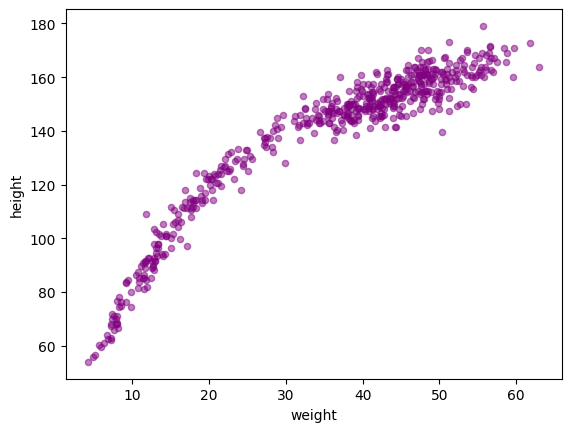

In [5]:
df.plot.scatter(x='weight',
                y='height',
                color='purple',
                alpha=0.5)

<Axes: xlabel='weight', ylabel='height'>

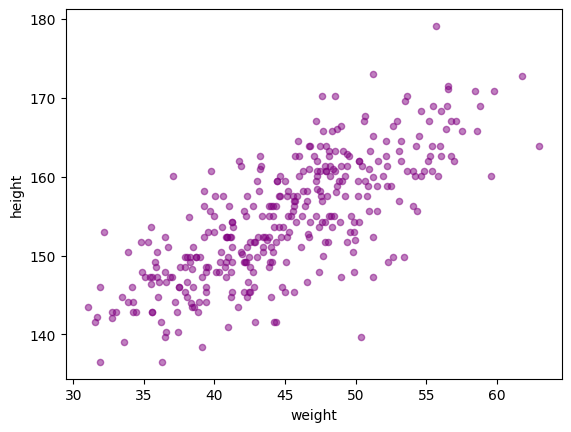

In [6]:
adultos = df[df.age >= 18].copy()
adultos.plot.scatter(x='weight',
                     y='height',
                     color='purple',
                     alpha=0.5)

> Peso ‚Üí es la variable predictora (o variable independiente).
>
> Altura ‚Üí es la variable respuesta (o dependiente).

In [7]:
adultos.describe()

height      weight         age        male
count  352.000000  352.000000  352.000000  352.000000
mean   154.597093   44.990486   41.138494    0.468750
std      7.742332    6.456708   15.967855    0.499733
min    136.525000   31.071052   18.000000    0.000000
25%    148.590000   40.256290   28.000000    0.000000
50%    154.305000   44.792210   39.000000    0.000000
75%    160.655000   49.292693   51.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000

Del gr√°fico anterior observamos que existe una relaci√≥n clara entre la **altura** y el **peso**. En otras palabras, conocer el peso de una persona nos puede ayudar a predecir su altura.

### **¬øC√≥mo incorporamos el peso como predictor en el modelo de altura?**

En el modelo gaussiano original, la altura de todas las personas se describe con la misma **media $\mu$**. Pero si creemos que la **altura cambia con el peso**, entonces esa media no deber√≠a ser fija.

Por eso, hacemos que $\mu$ **dependa linealmente del peso**:

$$\mu_i = \alpha + \beta(w_i - \bar{w})$$

Finalmente, debemos asignar _distribuciones previas_ a estos nuevos par√°metros $(\alpha, \beta, \sigma)$ para reflejar nuestra incertidumbre antes de observar los datos.

###  (a) Modelo inicial

* **Planteamiento del modelo sin predictores**

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu, \sigma) \\
\mu & \sim & \text{Normal}(170, 20) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

En el modelo inicial, asum√≠amos que **todas las personas tienen la misma media** $\mu$ para la altura:

$$
h_i \sim \text{Normal}(\mu, \sigma)
$$

donde $\mu$ es la **altura promedio** de toda la poblaci√≥n.

* **El nuevo planteamiento**

Sabemos que la _altura depende del peso_.

Entonces, ya no queremos que $\mu$ sea constante, sino que **cambie seg√∫n el peso de cada persona $w_i$**.

Para eso, hacemos que $\mu_i$ (la media para cada persona $i$) depende linealmente del peso:

$$
\mu_i = \alpha + \beta (w_i - \bar{w})
$$

Esa relaci√≥n $\alpha + \beta$ es la forma t√≠pica de un modelo lineal, una recta con:

* **intercepto** $\alpha$
* **pendiente** $\beta$
* predictor $w_i - \bar{w}$ (peso centrado)

### (b) modelo con peso como predictor

Sea $w_i$ el peso de la persona $i$ y $\bar{w}$ el promedio de todos los pesos. Definimos:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim & \text{Normal}(170, 20) \\
\beta & \sim & \text{Normal}(0, 10) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

En este nuevo modelo, 

* $\alpha$ representa la **altura promedio** cuando el peso est√° en su media.

* $\beta$ indica **cu√°nto cambia la altura** en promedio por cada unidad de cambio en el peso.

```{admonition} ¬øQu√© significa lo anterior?
:class: tip

$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$

Como antes, representa la _verosimilitud_, es decir, la probabilidad de los datos observados. La diferencia es que ahora sustituimos la media general $\mu$ por una media espec√≠fica $\mu_i$ para cada observaci√≥n.

En otras palabras, la media **ya no es constante**, sino que depende del valor del predictor de cada individuo.

$$
\mu_i = \alpha + \beta (w_i - \bar{w})
$$

Aqu√≠, $\mu_i$ **ya no es una par√°metro aleatorio**, sino una _relaci√≥n determinista_ entre los nuevos par√°metros $\alpha$ y $\beta$ y la variable observada $w_i$ (peso). Por eso usamos el s√≠mbolo "=" en lugar de "$\sim$".

El par√°metro $\beta$ representa el **cambio esperado en la altura** cuando el peso aumenta en una unidad (por ejemplo, 1 kg).

* Dem√°s expresiones

Corresponden a las _previas_ de los par√°metros. Como en los modelos anteriores, pueden ajustarse con ayuda de **simulaciones predictivas previas**, para asegurar que los valores iniciales sean razonables.
```

<details>
<summary> Curiosidades üí°</summary>

En el modelo bayesiano, el error no desaparece: est√° ‚Äúdentro‚Äù de la distribuci√≥n normal.
 
$\sigma$ mide cu√°nta incertidumbre o ruido hay alrededor de la l√≠nea promedio.

| **Enfoque** | **Expresi√≥n** | **C√≥mo representa el error** |
|--------------|---------------|------------------------------|
| M√≠nimos cuadrados | $h_i = \alpha + \beta x_i + \varepsilon_i$ | $\varepsilon_i$ es el error expl√≠cito |
| Bayesiano / Probabil√≠stico | $h_i \sim \text{Normal}(\mu_i, \sigma)$ | $\sigma$ controla la variabilidad (error impl√≠cito) |

</details>

### (c) Simulaci√≥n previa predictiva

In [8]:
N = 100
w = adultos.weight.values
w_bar = np.mean(w)

In [9]:
print(w[:10])
print(w.shape)

[47.8256065 36.4858065 31.864838  53.0419145 41.276872  62.992589
 38.2434755 55.4799715 34.869885  54.487739 ]
(352,)


In [10]:
w_bar

np.float64(44.99048551988636)

In [11]:
# Muestrar las distribuciones previas

# alpha ~ Normal(170, 20)
alpha_samples = stats.norm.rvs(loc=170,
                               scale=20, 
                               size=N)

# beta ~ Normal(0, 10)
beta_samples = stats.norm.rvs(loc=0,
                               scale=10,
                               size=N)

# sigma ~ Uniform(0, 50)
sigma_samples = stats.uniform.rvs(loc=0,
                                   scale=50,
                                   size=N)

In [12]:
# print samples
print(alpha_samples.shape)
print(beta_samples.shape)
print(sigma_samples.shape)

(100,)
(100,)
(100,)


In [13]:
# Relaci√≥n lineal de la altura promedio con el peso
mu = alpha_samples + beta_samples * (w - w_bar).reshape(-1, 1)

In [14]:
# print mu shape
print(mu.shape)

(352, 100)


In [15]:
mu

array([[190.50621137, 205.10569236, 168.1755669 , ..., 153.79399292,
        179.0083723 , 209.94168737],
       [121.45744117, 105.26474304, 132.79420402, ..., 323.16465285,
         43.23252108, 126.48919227],
       [ 93.32006731,  64.57955619, 118.37629864, ..., 392.18319678,
        -12.09613829,  92.48230051],
       ...,
       [216.91736598, 243.29485548, 181.7089382 , ...,  89.00971549,
        230.94263539, 241.86226674],
       [228.48303499, 260.01821449, 187.63531648, ...,  60.64012995,
        253.68509047, 255.84055967],
       [219.16145101, 246.53968633, 182.85883249, ...,  83.50516904,
        235.35535056, 244.57447283]], shape=(352, 100))

In [16]:
# Muestrar la distribuci√≥n de la altura

# height ~ Normal(mu, sigma)
height_samples = stats.norm.rvs(loc=mu,
                                scale=sigma_samples)

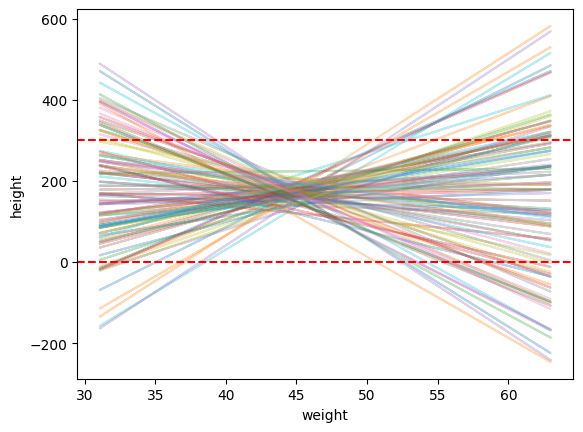

In [17]:
# Graficamos la altura promedio vs el peso
plt.plot(w, mu, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

#### Mejorando las distribuciones previas

Con las distribuciones previas que usamos antes, la *altura promedio* pod√≠a tomar valores poco realistas, incluso para pesos dentro del rango normal. Podemos mejorar esto ajustando nuestras suposiciones iniciales.

Al observar el gr√°fico de dispersi√≥n, notamos que la relaci√≥n entre altura y peso es **positiva**: las personas con mayor peso tienden a ser m√°s altas.

Para reflejar este conocimiento previo, podemos asegurar que el par√°metro $\beta$ (la pendiente) sea siempre positivo usando una **distribuci√≥n Log-Normal** en lugar de una normal.  

Esta distribuci√≥n solo toma valores mayores que cero:

$$
\beta \sim \text{LogNormal}(0, 1)
$$

Esto significa que el *logaritmo de $\beta$* sigue una distribuci√≥n normal con media 0 y desviaci√≥n est√°ndar 1.  
En otras palabras, garantizamos que $\beta > 0$, lo que representa de forma natural la relaci√≥n positiva entre peso y altura.

In [18]:
# Densidad lognormal
beta = stats.lognorm(s=1)

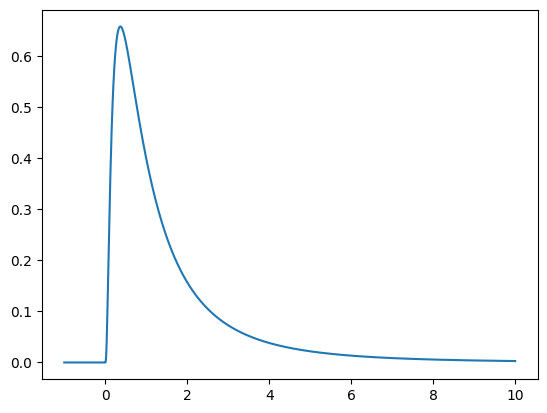

In [19]:
x = np.linspace(-1, 10, 1001)
plt.plot(x, beta.pdf(x))

In [20]:
# Simulaci√≥n previa predictiva ahora con lognormal para beta
N=100
w = adultos.weight.values
w_bar = np.mean(w)

#---
alpha_samples = stats.norm.rvs(loc=170, scale=20, size=N)
beta_samples = beta.rvs(size=N) ## solo esto cambi√≥
sigma_samples = stats.uniform.rvs(loc=0, scale=50, size=N)

#---
mu = alpha_samples + beta_samples * (w - w_bar).reshape(-1, 1)

#---
height_samples = stats.norm.rvs(loc=mu,
                                scale=sigma_samples)

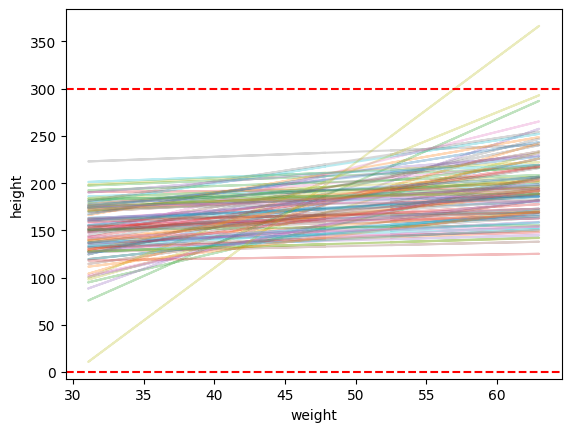

In [21]:
# Graficamos la altura promedio vs el peso
plt.plot(w, mu, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

#### Simulaci√≥n previa con la nueva distribuci√≥n

**¬°Esto se ve mucho mejor!**

Despu√©s de cambiar la distribuci√≥n previa de $\beta$ a una **Log-Normal**, todas las pendientes son ahora positivas, reflejando correctamente que la altura aumenta con el peso.  

$$
\beta \sim \text{LogNormal}(0, 1)
$$

En el gr√°fico, cada l√≠nea representa una posible relaci√≥n entre peso y altura generada desde las distribuciones previas.

A diferencia del caso anterior, ahora todas las l√≠neas tienen pendiente positiva y las alturas simuladas se concentran en un rango m√°s razonable (entre 0 y 300 cm).

De forma que nuestro modelo completo es:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim & \text{Normal}(170, 20) \\
\textcolor{red}{\beta} & \sim & \textcolor{red}{\text{Log-Normal}(0, 1)} \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$


### (d) Estimemos la distribuci√≥n posterior usando MCMC

In [22]:
import arviz as az
import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [23]:
w = adultos.weight.values
w_bar = np.mean(w)
h = adultos.height.values

In [24]:
w.shape

(352,)

In [25]:
w_bar

np.float64(44.99048551988636)

In [26]:
h.shape

(352,)

In [27]:
# Modelo

with pm.Model() as modelo_lineal_altura:
    # Sigma
    sigma = pm.Uniform('sigma',
                        lower=0,
                        upper=50)

    # Alpha
    alpha = pm.Normal('alpha',
                      mu=170,
                      sigma=20)
    # Beta
    beta = pm.Lognormal('beta',
                        mu=0,
                        sigma=1)

    # Mu
    mu = pm.Deterministic('mu',
                        alpha + beta * (w - w_bar))
    
    # altura
    altura = pm.Normal('altura',
                      mu=mu,
                      sigma=sigma,
                      observed=h) # alturas de mis datos
    
    # Muestreo
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 458 seconds.


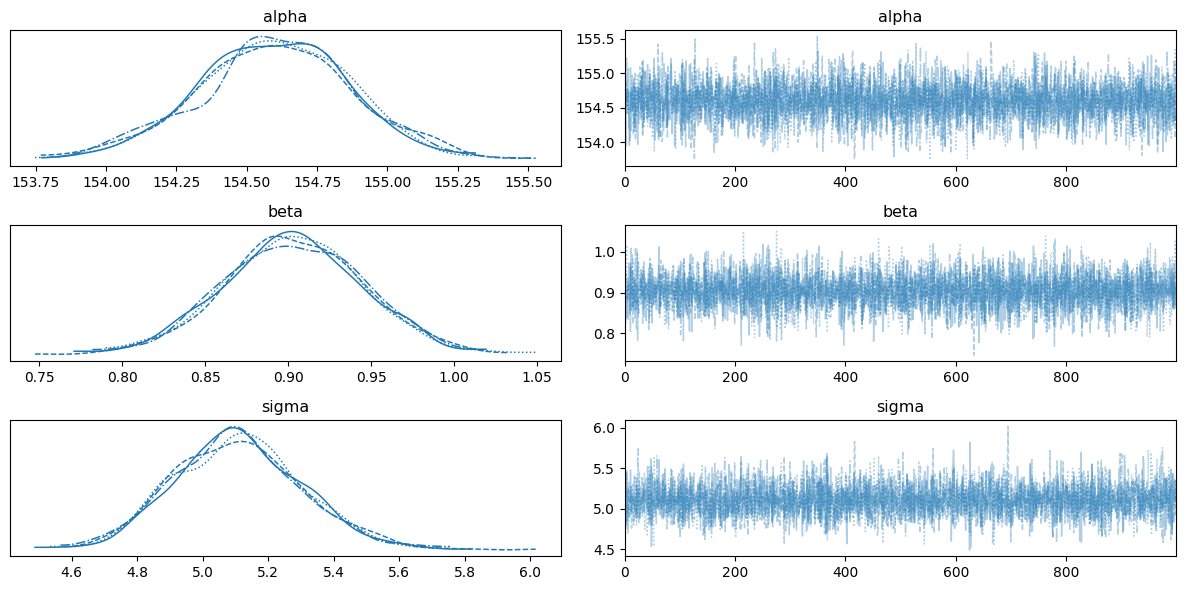

In [28]:
# Distribuci√≥n posterior de los par√°metros
az.plot_trace(idata, var_names=["alpha", "beta", "sigma"])
plt.tight_layout()

In [29]:
az.summary(idata, var_names=["alpha", "beta", "sigma"])

mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha  154.599  0.273  154.090  155.134      0.004    0.004    5738.0   
beta     0.903  0.042    0.829    0.985      0.001    0.001    6574.0   
sigma    5.106  0.197    4.743    5.473      0.003    0.003    5308.0   

       ess_tail  r_hat  
alpha    3138.0    1.0  
beta     3009.0    1.0  
sigma    2991.0    1.0

> ¬øqu√© podr√≠amos concluir?
>
> - La altura promedio es de 155 cm.
> - Por cada 1 kg adicional de peeso, se espera que la altura aumente en alrededor de 0.9 cm.
> - El 94% del intervalo de credibilidad para $beta$ se encuentra entre $0.82$ y $0.98$.

#### Predicciones con la distribuci√≥n posterior

El objetivo principal de este modelo es _realizar predicciones_ a partir de la distribuci√≥n posterior de los par√°metros.

Lo primero que podr√≠amos hacer es tomar el promedio de las muestras de $\alpha$ y $\beta$ y graficar la relaci√≥n promedio entre peso y altura:

In [30]:
# objeto de muestreo
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [31]:
post_samples = idata.posterior.to_dataframe()
post_samples

alpha      beta          mu     sigma
chain draw mu_dim_0                                            
0     0    0         154.795857  0.981895  157.579648  5.003727
           1         154.795857  0.981895  146.445156  5.003727
           2         154.795857  0.981895  141.907851  5.003727
           3         154.795857  0.981895  162.701514  5.003727
           4         154.795857  0.981895  151.149479  5.003727
...                         ...       ...         ...       ...
3     999  347       154.419339  0.973643  156.406869  5.064486
           348       154.419339  0.973643  143.958242  5.064486
           349       154.419339  0.973643  161.402882  5.064486
           350       154.419339  0.973643  163.252235  5.064486
           351       154.419339  0.973643  161.761711  5.064486

[1408000 rows x 4 columns]

Despu√©s de ajustar el modelo, tenemos muchas **muestras posteriores** de los par√°metros $\alpha$, $\beta$ y $\sigma$, obtenidas del muestreador NUTS.

Cada muestra representa una posible versi√≥n del modelo compatible con los datos observados.

Entonces, cuando calculamos lo siguiente, lo que hacemos es usar los **valores promedio de los par√°metros** para construir una sola l√≠nea representativa, la ‚Äúrelaci√≥n promedio‚Äù entre peso y altura.

En t√©rminos estad√≠sticos:

$$
E[\mu_i] = E[\alpha] + E[\beta] (w_i - \bar{w})
$$

In [32]:
# relaci√≥n promedio
alpha_avg = post_samples.alpha.mean()
beta_avg = post_samples.beta.mean()
mu_avg = alpha_avg + beta_avg * (w - w_bar)

In [33]:
print(alpha_avg)

154.59878966717534


In [34]:
print(beta_avg)

0.902993508284969


In [35]:
print(mu_avg.shape)

(352,)


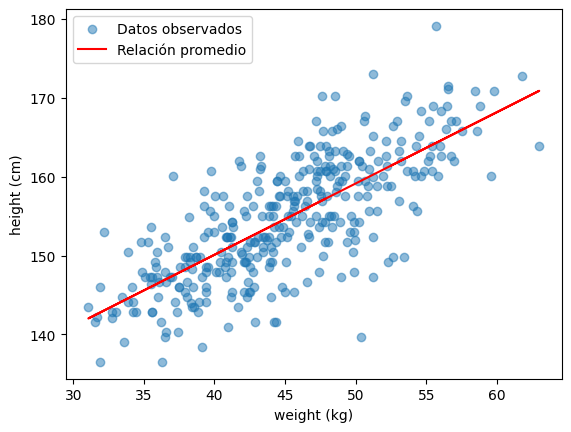

In [36]:
# -- scatter
plt.scatter(adultos.weight,
            adultos.height,
            alpha=0.5,
            label='Datos observados')
# -- l√≠nea
plt.plot(w, mu_avg, color='red', label='Relaci√≥n promedio')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend()

* **L√≠nea roja:**

La l√≠nea m√°s plausible dentro del conjunto de l√≠neas posibles que describe la distribuci√≥n posterior.

* **Franja de incertidumbre**

Sin embargo, el modelo no solo nos da una √∫nica l√≠nea, sino tambi√©n una **incertidumbre** sobre esa relaci√≥n.

Podemos visualizarla muestreando varias combinaciones de $\alpha$ y $\beta$ desde la distribuci√≥n posterior y graficando las l√≠neas resultantes.

Estas l√≠neas representan **distintas relaciones posibles** entre el peso y la altura, seg√∫n la informaci√≥n contenida en los datos y la variabilidad del modelo.

In [37]:
posterior_samples = post_samples.sample(500)
post_mu = posterior_samples.alpha.values + posterior_samples.beta.values * (w - w_bar).reshape(-1, 1)

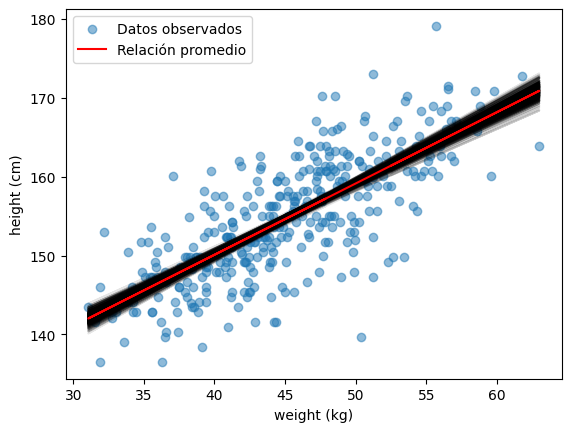

In [38]:
# -- scatter
plt.scatter(adultos.weight,
            adultos.height,
            alpha=0.5,
            label='Datos observados')

# -- l√≠neas
plt.plot(w, post_mu, color='black', alpha=0.1)
plt.plot(w, mu_avg, color='red', label='Relaci√≥n promedio')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend()

#### Interpretaci√≥n del gr√°fico

En la figura se muestran los **datos observados** (puntos azules) junto con las **predicciones del modelo**:

- **L√≠nea roja:** representa la *relaci√≥n promedio* entre peso y altura, calculada a partir del valor medio de los par√°metros posteriores ($E[\alpha]$ y $E[\beta]$).  
  Esta l√≠nea indica la tendencia central: cu√°nto se espera que aumente la altura al incrementar el peso.

- **L√≠neas negras semitransparentes:** muestran distintas *rectas posibles* obtenidas al muestrear varias combinaciones de $\alpha$ y $\beta$ desde la distribuci√≥n posterior.  
  Estas l√≠neas reflejan la $\textcolor{red}{incertidumbre\ de\ la\ media}$: aunque todas apuntan a una relaci√≥n positiva, var√≠an ligeramente en su pendiente e intercepto.

#### Preguntas que nos podr√≠amos hacer

> _¬øCu√°nto es la altura promedio de una persona de 60 kg?_

Usaremos las muestras de la posterior para responder esta pregunta.

In [39]:
post_samples.head()

alpha      beta          mu     sigma
chain draw mu_dim_0                                            
0     0    0         154.795857  0.981895  157.579648  5.003727
           1         154.795857  0.981895  146.445156  5.003727
           2         154.795857  0.981895  141.907851  5.003727
           3         154.795857  0.981895  162.701514  5.003727
           4         154.795857  0.981895  151.149479  5.003727

In [40]:
# Promediar sobre mu_dim_0
posterior_reduced = post_samples.groupby(["chain", "draw"])[["alpha", "beta", "sigma"]].mean().reset_index()
posterior_reduced

chain  draw       alpha      beta     sigma
0         0     0  154.795857  0.981895  5.003727
1         0     1  154.812761  0.825244  5.174800
2         0     2  154.709150  0.883525  4.793960
3         0     3  154.709150  0.883525  4.793960
4         0     4  154.417637  0.892126  5.454047
...     ...   ...         ...       ...       ...
3995      3   995  154.521926  0.861555  5.177845
3996      3   996  154.700385  0.927564  4.840888
3997      3   997  154.700385  0.927564  4.840888
3998      3   998  154.267990  0.871437  5.352156
3999      3   999  154.419339  0.973643  5.064486

[4000 rows x 5 columns]

In [41]:
# calcular mu a 60 kg
mu_60 = posterior_reduced["alpha"].values + posterior_reduced["beta"].values * (60 - w_bar)
mu_60.shape

(4000,)

<Axes: >

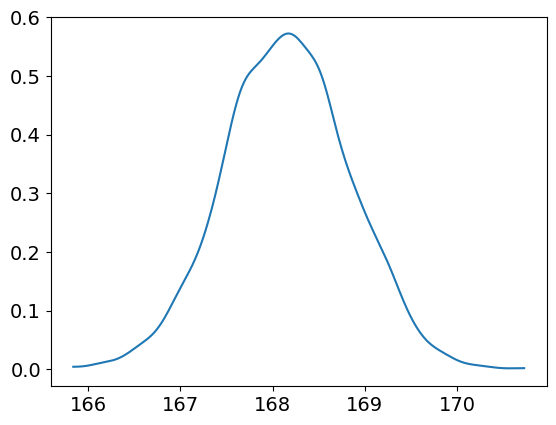

In [42]:
az.plot_kde(mu_60)

In [43]:
az.summary(mu_60, hdi_prob=0.89)

arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
x  168.152  0.684   167.122      169.3      0.009    0.011    6415.0   

   ess_tail  r_hat  
x    3102.0    NaN

#### Diferencia entre la posterior y la posterior predictiva

Piensen en la **l√≠nea roja** como lo que el modelo cree que pasa *en promedio*.  
Las **l√≠neas negras** son sus dudas sobre esa l√≠nea ‚Äî podr√≠a ser un poco m√°s inclinada o m√°s plana.  

Pero las personas reales no caen exactamente sobre la l√≠nea, ¬øverdad?  
La **banda naranja** muestra esa variaci√≥n natural: lo que el modelo esperar√≠a si midiera nuevas personas.

<details>
<summary> M√°s a fondo... üí°</summary>

### Posterior

En la **posterior**, el modelo estima la distribuci√≥n de los par√°metros  
$\alpha, \beta, \sigma$ dados los datos observados:

$$
p(\alpha, \beta, \sigma \mid \text{datos})
$$

Con esas muestras podemos calcular la **altura media esperada** para cada persona:

$$
\mu_i^{(s)} = \alpha^{(s)} + \beta^{(s)} (w_i - \bar{w})
$$

Esto describe la **incertidumbre sobre la recta promedio**,  
pero **no incluye todav√≠a la variabilidad natural** de las alturas individuales.

### Posterior predictiva

La **posterior predictiva** usa esas mismas muestras de la posterior para simular c√≥mo se ver√≠an *nuevos datos reales* si repiti√©ramos el experimento:

$$
h_i^{(s)} \sim \text{Normal}(\mu_i^{(s)}, \sigma^{(s)})
$$

Aqu√≠ el modelo agrega la variabilidad individual (\(\sigma\)), lo que genera la **banda naranja**: una franja m√°s ancha que refleja la dispersi√≥n esperada de las alturas reales.


| Concepto | Qu√© muestra | F√≥rmula principal | Banda en el gr√°fico |
|-----------|--------------|-------------------|--------------------|
| **Posterior** | Incertidumbre sobre los par√°metros y la recta promedio | $ \mu_i = \alpha + \beta (w_i - \bar{w}) $ | Banda **angosta** |
| **Posterior predictiva** | Incertidumbre sobre los datos reales (media + ruido) | $ h_i \sim \text{Normal}(\mu_i, \sigma) $ | Banda **ancha (naranja)** |

</details>

### (e) ¬øy, $\sigma$?

Recordemos que el modelo completo para la altura es:

$$
\begin{align}
h_i & \sim \text{Normal}(\mu_i, \sigma)
\end{align}
$$

Hasta ahora nos hemos enfocado en $\mu_i$, que representa la altura promedio esperada para una persona con cierto peso.

Sin embargo, el modelo tambi√©n incluye la _variabilidad_ de las alturas alrededor de ese promedio y esa variabilidad est√° controlada por el par√°metro $\sigma$.

In [44]:
with modelo_lineal_altura:
    idata.extend(pm.sample_posterior_predictive(idata))

Sampling: [altura]


Output()

In [45]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

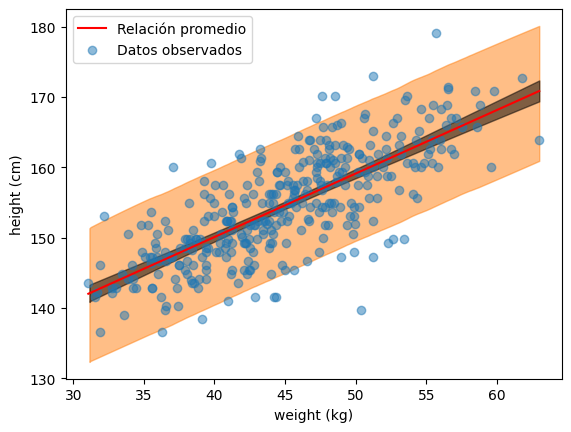

In [46]:
# Eje x
x = adultos.weight.values
order = x.argsort()

# HDI de la posterior predictiva (incertidumbre total: params + œÉ)
az.plot_hdi(x, idata.posterior_predictive["altura"])

# HDI de la media condicional (incertidumbre de par√°metros, sin œÉ)
az.plot_hdi(x, idata.posterior["mu"], color="black")

# L√≠nea de relaci√≥n promedio (media posterior de Œº)
mean_mu = idata.posterior["mu"].mean(dim=["chain","draw"])
plt.plot(x[order], mean_mu.isel(mu_dim_0=order), color="red", label="Relaci√≥n promedio")

# Datos observados
plt.scatter(adultos.weight, adultos.height, alpha=0.5, label="Datos observados")

plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.legend()
plt.show()

## 2. Evaluaci√≥n del modelo

Hasta ahora, hemos utilizado los mismos datos que sirvieron para ajustar el modelo al momento de visualizar sus predicciones.

Si queremos comprobar qu√© tan bien generaliza a casos nuevos, necesitamos probarlo en **datos que no haya visto antes**.

> ¬øc√≥mo evaluar su desempe√±o predictivo en datos nuevos?

In [47]:
# Primero dividimos el conjunto de datos original en dos partes:
train = adultos.sample(frac=0.8)
test = adultos.drop(train.index)
adultos.shape, train.shape, test.shape

((352, 4), (282, 4), (70, 4))

In [48]:
#Definimos las variables  para el modelo
w=train.weight.values #datos de peso para train
w_bar = np.mean(w) #promedio de peso
h=train.height.values #datos de altura para train

In [49]:
#Construcci√≥n del modelo bayesiano

with pm.Model() as modelo_lineal_altura:

    w = pm.Data("w", w, dims="obs_id") # datos mutables; contenedor
    h = pm.Data("h", h, dims="obs_id")

    # Sigma
    sigma = pm.Uniform('sigma',
                        lower=0,
                        upper=50)
    # Alpha
    alpha = pm.Normal('alpha',
                      mu=170,
                      sigma=20)
    # Beta
    beta = pm.Lognormal('beta',
                        mu=0,
                        sigma=1)
    # Mu
    mu = pm.Deterministic('mu',
                        alpha + beta * (w - w_bar), dims="obs_id")
    # altura
    altura = pm.Normal('altura',
                      mu=mu,
                      sigma=sigma,
                      observed=h, dims="obs_id")

    # Muestreo
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 438 seconds.


In [50]:
# Con el modelo entrenado, predecimos sobre datos de prueba
w_test = test.weight.values

In [51]:
w_test[:5]

array([31.864838 , 38.2434755, 47.7      , 38.3568735, 37.9032815])

Primero actualizamos el modelo con los nuevos pesos (``set_data``), y luego generamos predicciones usando los par√°metros aprendidos (``sample_posterior_predictive``), sin volver a entrenar el modelo.

In [52]:
with modelo_lineal_altura:
    pm.set_data({"w": w_test}) # actualiza el contenedor w del modelo con los pesos del test (sin re-entrenar).
    #muestreo posterior predictivo
    altura_pred = pm.sample_posterior_predictive(
        idata,
        var_names=["altura", "mu"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True
    )

Sampling: [altura]


Output()

| Argumento | Qu√© hace |
|------------|-----------|
| `idata` | Usa las muestras del modelo entrenado (Œ±, Œ≤, œÉ) para generar predicciones. |
| `var_names` | Especifica qu√© variables del modelo queremos predecir. En este caso, pedimos tanto las alturas simuladas (`altura`) como las medias esperadas (`mu`). |
| `return_inferencedata=True` | Devuelve los resultados en formato **ArviZ InferenceData**, lo que facilita el an√°lisis posterior. |
| `predictions=True` | Guarda las predicciones bajo la secci√≥n `idata.predictions`, separadas del posterior original. |
| `extend_inferencedata=True` | Agrega estas nuevas predicciones al mismo objeto `idata` sin sobrescribir la informaci√≥n anterior. |


In [53]:
altura_pred

Inference data with groups:
	> posterior
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

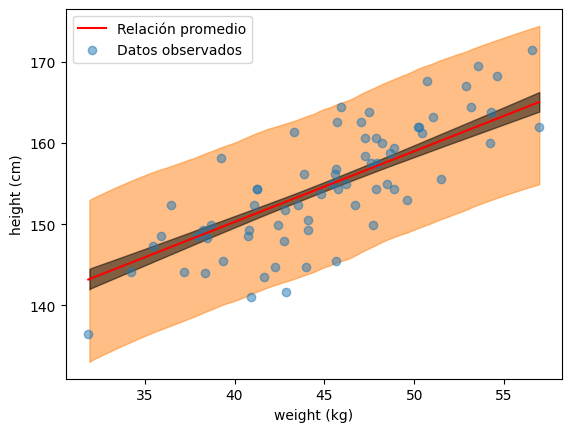

In [54]:
# Eje X 
x = test.weight.values
order = x.argsort()

# HDI de la posterior predictiva (incertidumbre total: params + œÉ)
az.plot_hdi(x, altura_pred.predictions["altura"])

# HDI de la media condicional (incertidumbre de par√°metros, sin œÉ)
az.plot_hdi(x, altura_pred.predictions["mu"], color="black")

# L√≠nea de relaci√≥n promedio (media posterior de Œº)
mean_mu = altura_pred.predictions["mu"].mean(dim=["chain","draw"])  # dims: ('obs_id',)
plt.plot(x[order], mean_mu.isel(obs_id=order), color="red", label="Relaci√≥n promedio")

# Datos observados
plt.scatter(test.weight, test.height, alpha=0.5, label="Datos observados")

plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.legend()
plt.show()

#### M√©tricas de evaluaci√≥n

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
r2_score(test['height'], altura_pred.predictions["mu"].mean(("chain", "draw")))

0.6023863409899273

In [57]:
mean_squared_error(test['height'], altura_pred.predictions["mu"].mean(("chain", "draw")))

22.75521189053069

In [58]:
# Calcular la cobertura del 90% de los intervalos predictivos

# calculamos el intervalo cre√≠ble (HDI) del 90% para las alturas predichas
hdi_90 = az.hdi(altura_pred.predictions["altura"], hdi_prob=0.9)

# extraemos los l√≠mites inferior y superior del intervalo
lower = hdi_90["altura"].sel(hdi="lower").values
upper = hdi_90["altura"].sel(hdi="higher").values

# calculamos la proporci√≥n de observaciones reales dentro del intervalo
coverage_90 = ((test["height"].values >= lower) & (test["height"].values <= upper)).mean()

print(f"Cobertura del 90%: {coverage_90*100:.1f}%")

Cobertura del 90%: 91.4%


significa que, de todas las observaciones reales del conjunto de prueba (las alturas verdaderas), el $92.9 \%$ cay√≥ dentro del intervalo predictivo del $90 \%$ que gener√≥ nuestro modelo.

In [59]:
# Predicci√≥n media por observaci√≥n
y_pred_mean = altura_pred.predictions["mu"].mean(("chain", "draw")).values

# Intervalo de credibilidad del 90%
hdi_90 = az.hdi(altura_pred.predictions["altura"], hdi_prob=0.9)
lower = hdi_90["altura"].sel(hdi="lower").values
upper = hdi_90["altura"].sel(hdi="higher").values

# Combinar todo en un df para inspeccionar
pred_df = pd.DataFrame({
    "peso_test": test["weight"].values,
    "altura_real": test["height"].values,
    "altura_pred_media": y_pred_mean,
    "pred_lo_90": lower,
    "pred_hi_90": upper
})

# si la observaci√≥n cae dentro del intervalo
pred_df["en_intervalo"] = (
    (pred_df["altura_real"] >= pred_df["pred_lo_90"]) &
    (pred_df["altura_real"] <= pred_df["pred_hi_90"])
)

pred_df.head(10)

peso_test  altura_real  altura_pred_media  pred_lo_90  pred_hi_90  \
0  31.864838     136.5250         143.183618  134.155235  151.628678   
1  38.243476     149.2250         148.742334  140.011846  157.352324   
2  47.700000     149.9000         156.983299  148.324319  165.742294   
3  38.356873     143.9418         148.841155  139.897801  157.012341   
4  37.903281     148.5900         148.445869  140.193645  157.279880   
5  35.465224     147.3200         146.321204  137.669633  154.943044   
6  56.557252     171.4500         164.702024  155.601762  172.643398   
7  41.248522     154.3050         151.361106  143.017104  159.957270   
8  46.719976     152.4000         156.129249  147.925899  165.619158   
9  45.897841     164.4650         155.412793  146.867346  164.062796   

   en_intervalo  
0          True  
1          True  
2          True  
3          True  
4          True  
5          True  
6          True  
7          True  
8          True  
9         False

In [60]:
pred_df.en_intervalo.value_counts()

en_intervalo
True     64
False     6
Name: count, dtype: int64

## Comentarios finales

> * La **funci√≥n lineal** utilizada en este modelo no es la √∫nica posible.
> As√≠ como vimos en la clase de ajuste de polinomios, podr√≠amos emplear funciones no lineales (cuadr√°ticas, c√∫bicas,   exponenciales, etc.) para capturar relaciones m√°s complejas entre las variables.
> Aqu√≠ usamos una forma lineal por simplicidad y claridad conceptual.
>
> * Todas las consideraciones de ingenier√≠a de caracter√≠sticas que aplican en modelos de regresi√≥n cl√°sica (escalamiento, centrado, transformaci√≥n, creaci√≥n de variables, etc.) **tambi√©n aplican en modelos bayesianos.** Estas decisiones influyen directamente en la estabilidad num√©rica, la interpretaci√≥n de los par√°metros y la velocidad de muestreo.
>
> * La parte m√°s ingenieril/artesanal del modelado bayesiano radica en definir adecuadamente las distribuciones previas y probar distintas formulaciones del modelo. Es decir, el trabajo no solo consiste en ajustar el modelo, sino en reflexionar sobre qu√© suposiciones probabil√≠sticas representan mejor el fen√≥meno que queremos describir.

## Extra: Modelo lineal multivariable

Incorporamos ahora tres predictores:  
- el **peso** ($w_i$),  
- la **edad** ($a_i$),  
- y el **sexo** ($s_i$), codificado como $s_i = 0$ para mujeres y $s_i = 1$ para hombres.  

El modelo jer√°rquico queda definido as√≠:

$$
\begin{align}
h_i &\sim \text{Normal}(\mu_i, \sigma) \\
\mu_i &= \alpha + \beta_w (w_i - \bar{w}) + \beta_a (a_i - \bar{a}) + \beta_s s_i \\
\alpha &\sim \text{Normal}(170, 20) \\
\beta_w &\sim \text{Normal}(0, 1) \\
\beta_a &\sim \text{Normal}(0, 1) \\
\beta_s &\sim \text{Normal}(0, 10) \\
\sigma &\sim \text{Uniform}(0, 50)
\end{align}
$$

### Interpretaci√≥n de los par√°metros

- $\alpha$: altura promedio cuando el peso y la edad est√°n en su media y el sexo es femenino ($s_i=0$).  
- $\beta_w$: cambio promedio en altura por cada unidad adicional de **peso**, manteniendo edad y sexo constantes.  
- $\beta_a$: cambio promedio en altura por cada unidad adicional de **edad**, manteniendo peso y sexo constantes.  
- $\beta_s$: diferencia promedio en altura entre **hombres** y **mujeres**, controlando por peso y edad.  
- $\sigma$: desviaci√≥n est√°ndar del error, representa la variabilidad no explicada por el modelo.
